# CH03 - Evaluation(평가)

정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
%matplotlib inline

In [15]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)

    return df

In [16]:

# Label Encoding
def encode_features(dataDF):
    Features = ['Cabin', 'Sex', 'Embarked']
    for feature in Features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

In [17]:
# 머신러닝 알고리즘에 불필요한 속성 제거

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

In [18]:
# label encoding
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

In [19]:
#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)

    return df

In [35]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [20]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)

### Precision / Recall Trade-off

In [28]:
pred_proba = lr_clf.predict_proba(x_test)
pred_proba

array([[0.4616653 , 0.5383347 ],
       [0.87862763, 0.12137237],
       [0.87727002, 0.12272998],
       [0.88283621, 0.11716379],
       [0.85508952, 0.14491048],
       [0.88231157, 0.11768843],
       [0.88838988, 0.11161012],
       [0.20916926, 0.79083074],
       [0.78258628, 0.21741372],
       [0.36993909, 0.63006091],
       [0.89988359, 0.10011641],
       [0.87482056, 0.12517944],
       [0.87726414, 0.12273586],
       [0.88834471, 0.11165529],
       [0.43495818, 0.56504182],
       [0.85888537, 0.14111463],
       [0.9037587 , 0.0962413 ],
       [0.73319742, 0.26680258],
       [0.72417011, 0.27582989],
       [0.17255821, 0.82744179],
       [0.75341614, 0.24658386],
       [0.61951539, 0.38048461],
       [0.85451436, 0.14548564],
       [0.81519357, 0.18480643],
       [0.88797994, 0.11202006],
       [0.76533031, 0.23466969],
       [0.85969194, 0.14030806],
       [0.92608161, 0.07391839],
       [0.71933832, 0.28066168],
       [0.69482833, 0.30517167],
       [0.

In [30]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],[2,0,0], [0,1.1,1.2]]

In [32]:
binarizer = Binarizer(1.1)  # 1.1 보다 작거나 같으면 0 크면 1
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [38]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(custom_threshold).fit_transform(pred_proba_1)
get_clf_eval(y_test, binarizer)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 0.7742, 0.7869


In [42]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(custom_threshold).fit_transform(pred_proba_1)
get_clf_eval(y_test, binarizer)

오차행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 0.7286, 0.8361


In [60]:
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_thresholds in thresholds:
        pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
        binarizer = Binarizer(custom_thresholds).fit_transform(pred_proba_1)
        print('임계값: ',custom_thresholds)
        get_clf_eval(y_test, binarizer)

### F1 SCORE

In [65]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [71]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(x_test)
# pred_proba_1 = pred_proba[:, 1].reshape(-1,1)
# binarizer = Binarizer(custom_threshold).fit_transform(pred_proba_1)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값:  0.4
오차행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, f1: 0.7786
임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, f1: 0.7840
임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1: 0.7805
임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, f1: 0.7931
임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, f1: 0.8036


In [81]:
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]
fprs , tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(0, thresholds.shape[0], 5)
print('sample thr index : ', thr_index)
print('Sample index values: ', np.round(thresholds[thr_index], 2))

print('Sample FPR: ', np.round(fprs[thr_index], 3))
print('Sample TPR: ', np.round(tprs[thr_index], 3))


sample thr index :  [ 0  5 10 15 20 25 30 35 40 45 50]
Sample index values:  [1.97 0.75 0.63 0.59 0.49 0.4  0.31 0.15 0.12 0.11 0.1 ]
Sample FPR:  [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
Sample TPR:  [0.    0.475 0.672 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


In [77]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs , tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0,1],'k--', label='random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TRP(Recall)')
    plt.legend()

    

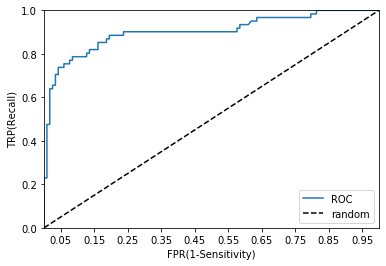

In [78]:
roc_curve_plot(y_test, pred_proba[:, 1])

In [82]:
### 피마 인디언 당뇨병 사례

In [84]:
diabetes_data = pd.read_csv('pima_indian_diabetes.csv')

In [85]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [92]:
def get_clf_eval(y_test, pred =None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [96]:
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 156, stratify = y)

In [97]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, f1: 0.6392, AUC:0.7919
